# **Linear Regression**
## **Chuchu Jin**

In [1]:
import numpy as np # linear algebra
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
'''Mean normalization'''
def mean_deviation_scale(data,expect_mean=0,expect_diviation=1):
    array = data.copy()
    if len(array.shape)==1:
        return (array-np.mean(array))/np.std(array)*expect_diviation+expect_mean
    
    for i in range(len(array.T)):
        column = array.T[i]
        array.T[i] = (column-np.mean(column))/(np.std(column))*expect_diviation+expect_mean
    return array

In [3]:
def train_test_split(data,test_percentage=0.9,random_seed = 0):
    np.random.seed(random_seed)
    np.random.shuffle(data)
    split = (int)(len(data)*test_percentage)
    return data[:split],data[split:]

In [4]:
'''Denormalization'''
def denormalization(data,old_mean,old_std):
    array = data.copy()
    if len(array.shape)==1:
        array = array*old_std+old_mean
        return array
    else:
        for i in range(len(array.T)):
            column = array.T[i]
            array.T[i]=column*old_std[i]+old_mean[i]
        return array

'''
a = np.array([[1.0,2.0],
              [2.0,2.0],
              [4.0,3.0]])
b = np.mean(a,axis=0)
c = np.std(a,axis=0)
d = mean_deviation_scale(a)
print (d)
denormalization(d,b,c)
'''

'\na = np.array([[1.0,2.0],\n              [2.0,2.0],\n              [4.0,3.0]])\nb = np.mean(a,axis=0)\nc = np.std(a,axis=0)\nd = mean_deviation_scale(a)\nprint (d)\ndenormalization(d,b,c)\n'

In [5]:
'''plot and scatter'''
def plot(data,pred,title='title',axisX='X',axisY='Y'):
    plt.figure()
    plt.title(title)
    plt.xlabel(axisX)
    plt.ylabel(axisY)
    plt.plot(data.T[0],pred,color = 'blue')
    plt.scatter(data.T[0],data.T[1],color = 'red')


In [6]:
'''calculate gradient and update the b,m'''
def gradient(data,learning_rate,cur_b,cur_m):
    b_gradient = 0
    m_gradient =0
    N = (float)(len(data))
    
    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1]
        b_loss = -(2/N) * (y-cur_m*x-cur_b)
        m_loss = b_loss*x
        b_gradient += b_loss
        m_gradient += m_loss
    
    return cur_b-learning_rate*b_gradient,cur_m-learning_rate*m_gradient

In [7]:
'''gradient decent loop,close when diff< 1 e -7'''
def decent(data,iterationNum,learning_rate,init_b,init_m):
    b=init_b
    m=init_m
    
    pre_b = -1
    pre_m = -1
    
    for i in range(iterationNum):
        b,m = gradient(data,learning_rate,b,m)
        if b-pre_b<1e-7 and m-pre_m<1e-7:
            break;
        pre_b = b
        pre_m = m
        
    return b,m

In [8]:
'''Linear Regression'''
def LinearRegression(data,iterationNum=1000,learning_rate=0.001,b=0.0,m=0.0):
    #y = mx+b
    return decent(data,iterationNum,learning_rate,b,m)

In [9]:
'''predict and denormalize'''
def pred(data,b,m,mean,std):
    return denormalization(m*data+b,mean,std)

In [10]:
#calculate root-mean-square
def rmes(pred,actual):
    res = np.sqrt(((pred - actual) ** 2).mean())
    print("root-mean-square is:"),
    print(res)
    return res

In [11]:
dataset = pd.read_csv("kc_house_data.csv")

In [12]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.4+ MB


In [13]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
#check null value
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
#check 0 value
dataset_copy = dataset.copy(deep = True)
dataset_copy.replace(0,np.NaN)
print(dataset_copy.isnull().sum())

del dataset_copy

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


##### features explanation from https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

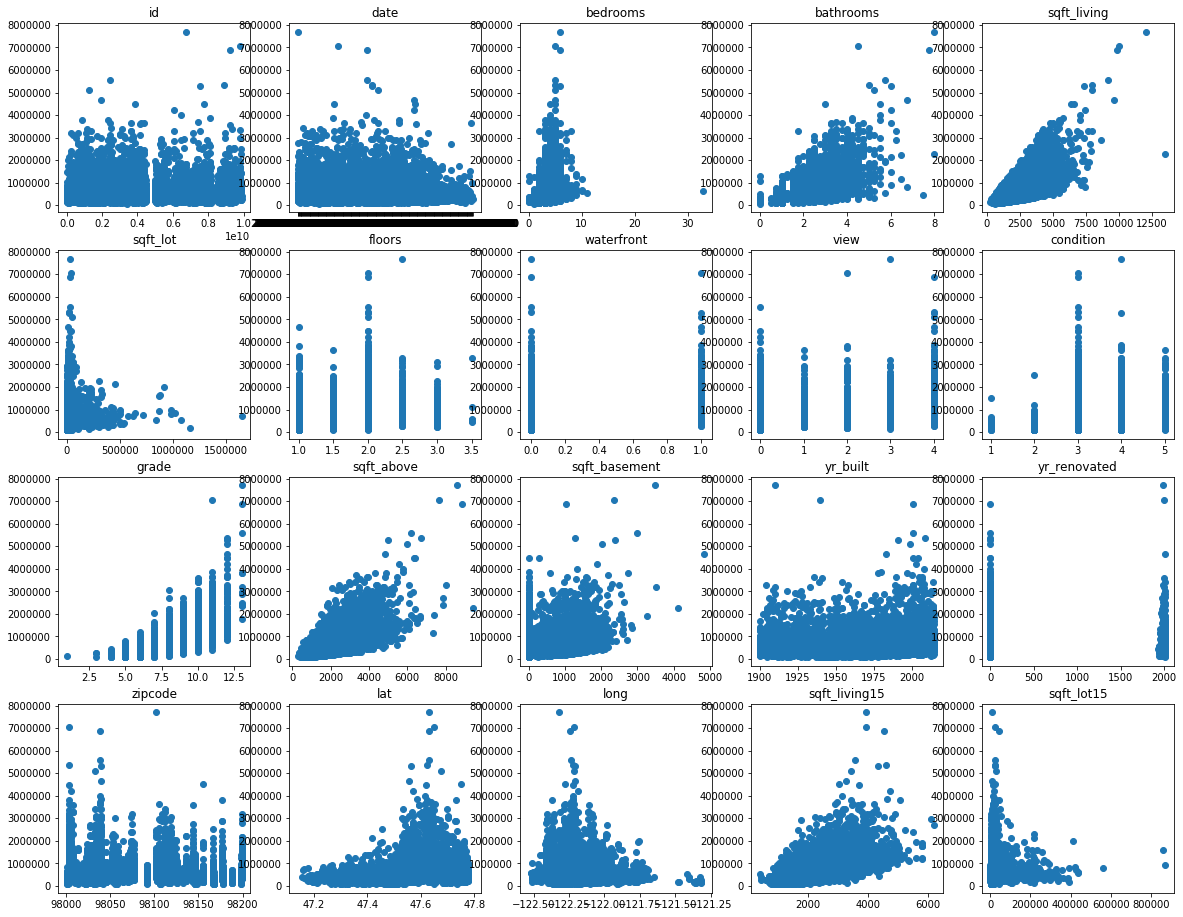

In [16]:
#show how price vary with every other feature
plt.figure(figsize=(20,16))
index=1
for key in dataset.keys():
    if(key!='price'):
        plt.subplot(4,5,index)
        plt.title(key)
        plt.scatter(dataset[key],dataset['price'])
        index+=1

If we want to do linear regression, a linear relationship must be satisfied between the independent and dependent variables.
From the pictures above, we can find some features: 'sqft_living','sqft_above','sqft_living15'
Those features and 'price' can be seen to have a clear linear relationship. 
According to the meaning of these features, I chose 'sqft_living' as the feature to study.

In [17]:
#choose one feature and scale it
df_select = dataset[['sqft_living','price']]
df_mean = np.mean(df_select.values,axis=0)#store mean and std, help denormalization
df_std = np.std(df_select.values,axis=0)
df_scaled = mean_deviation_scale(df_select.values)

#train-test split
train_set,test_set = train_test_split(df_scaled,0.9,5)

In [18]:
%%time
print("Training...")
b,m = LinearRegression(train_set)


Training...
Wall time: 37.9 s


In [19]:
%%time
print("Predicting...")
pred_train = pred(train_set[:,0],b,m,df_mean[1:],df_std[1:])
pred_test = pred(test_set[:,0],b,m,df_mean[1:],df_std[1:])

Predicting...
Wall time: 963 µs


In [20]:
print("Denormalize")
de_train = denormalization(train_set,df_mean,df_std)
de_test = denormalization(test_set,df_mean,df_std)

Denormalize


root-mean-square is:
261480.24000472383


261480.24000472383

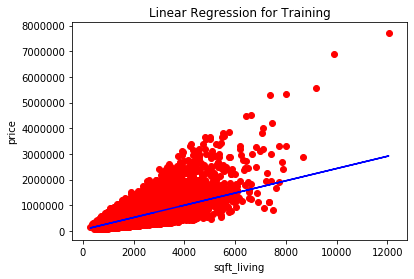

In [21]:
plot(de_train,pred_train,'Linear Regression for Training','sqft_living','price')
rmes(pred_train,de_train[:,1])

root-mean-square is:
287889.6170322912


287889.6170322912

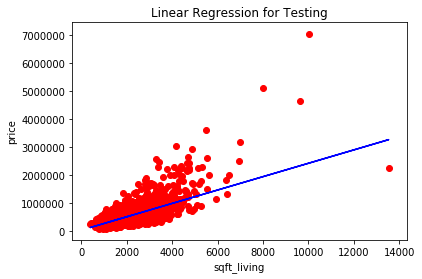

In [22]:
plot(de_test,pred_test,'Linear Regression for Testing','sqft_living','price')
rmes(pred_test,de_test[:,1])

In [23]:
for i in range(3):
    b,m = LinearRegression(train_set,learning_rate=0.001*pow(10,i))
    pred_test = pred(test_set[:,0],b,m,df_mean[1:],df_std[1:])
    de_test = denormalization(test_set,df_mean,df_std)
    print("learning_rate = ",0.001*pow(10,i))
    rmes(pred_test,de_test[:,1])
    

learning_rate =  0.001
root-mean-square is:
287889.6170322912
learning_rate =  0.01
root-mean-square is:
281683.1747995092
learning_rate =  0.1
root-mean-square is:
281682.99402821
